In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from rectangle import Rectangle
from sklearn.linear_model import LinearRegression
import utility

In [2]:
df = pd.read_csv("Data/Data3Dnoised5000.csv", index_col=0)
X = df.iloc[:,0:20].values
y = df[["r1", "r2", "r3"]].values
X_train, X_test, X_cal, y_train, y_test, y_cal = utility.calibration_split(X, y)
# Fit model to training
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9678109131513951


In [3]:
# Vectorized calibration scores
prediction = model.predict(X_cal)
scores = np.abs(prediction - y_cal)
scores_T = np.transpose(scores)

# Test scores
prediction_test = model.predict(X_test)
scores_test = np.abs(prediction_test - y_test)

(<Figure size 1500x500 with 3 Axes>,
 array([<Axes: title={'center': 'Projection on dims (0, 1)'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
        <Axes: title={'center': 'Projection on dims (0, 2)'}, xlabel='Dimension 0', ylabel='Dimension 2'>,
        <Axes: title={'center': 'Projection on dims (1, 2)'}, xlabel='Dimension 1', ylabel='Dimension 2'>],
       dtype=object))

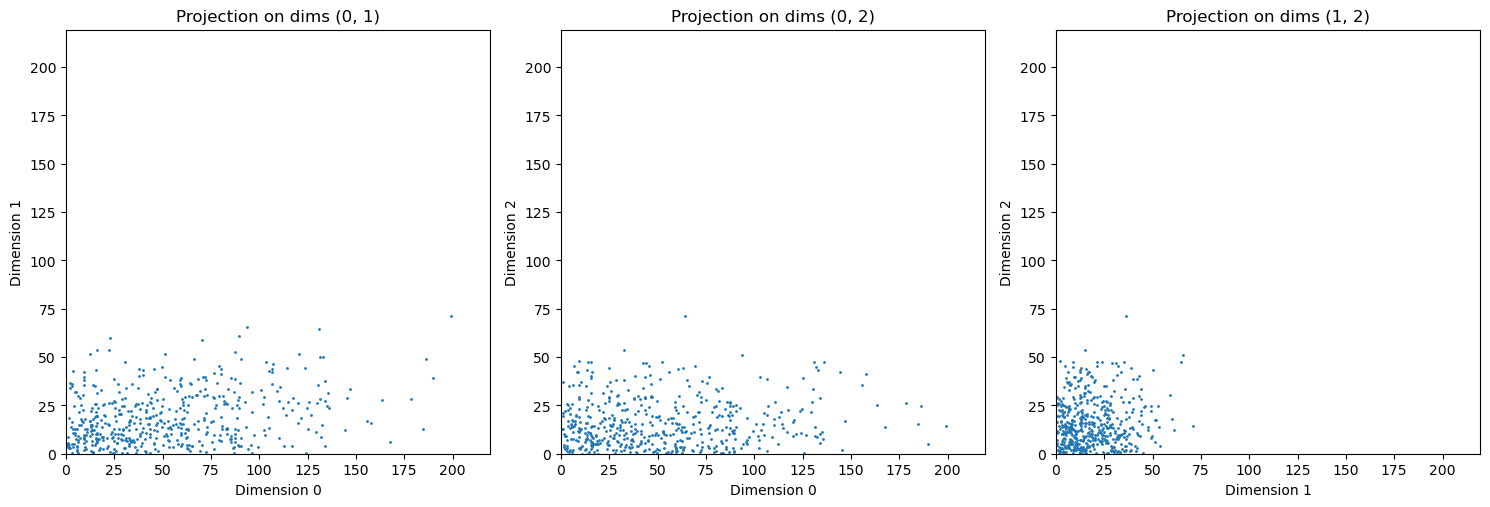

In [4]:
utility.make_score_plot(scores)

(<Figure size 1500x500 with 3 Axes>,
 array([<Axes: title={'center': 'Projection on dims (0, 1)'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
        <Axes: title={'center': 'Projection on dims (0, 2)'}, xlabel='Dimension 0', ylabel='Dimension 2'>,
        <Axes: title={'center': 'Projection on dims (1, 2)'}, xlabel='Dimension 1', ylabel='Dimension 2'>],
       dtype=object))

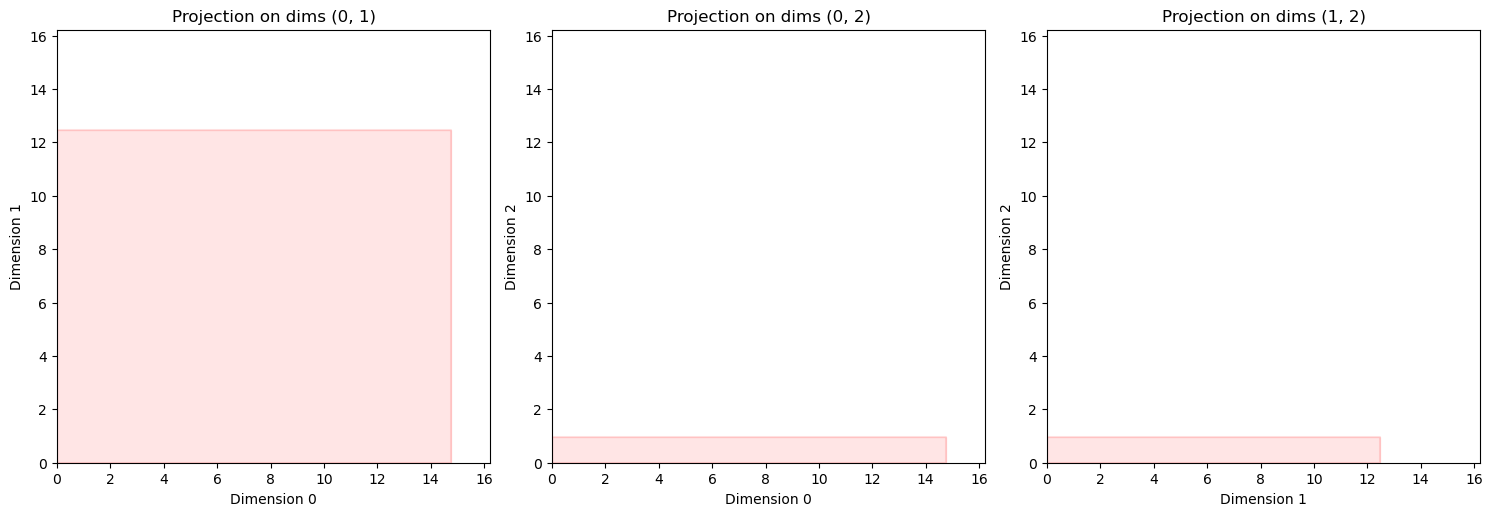

In [5]:
a = Rectangle(scores[1])
a.plot()

In [19]:
scores_unique = np.unique(scores, axis=1)
scores_sorted = np.sort(np.transpose(scores_unique), axis = 1)
scores_sorted

array([[2.05976397e-01, 2.49105481e-01, 3.01355335e-01, ...,
        6.47472401e+01, 6.55551844e+01, 7.11436678e+01],
       [3.93620760e-02, 7.16524536e-02, 1.14440300e-01, ...,
        5.09613604e+01, 5.35945044e+01, 7.10345213e+01],
       [5.02544486e-01, 8.87823535e-01, 9.80590634e-01, ...,
        1.86320555e+02, 1.89725327e+02, 1.99452291e+02]])

In [ ]:
for idx1 in range(scores_sorted.shape[0]):
    for idx2